# 16 회귀분석

## 회귀분석
* 상관분석은 변수들이 얼마나 밀접한 관계를 가지고 있는지 분석하는 통계적 기법
* 반면, 회귀분석은 (상관분석 + 예측)하는 통계적 기법
* 수량형 값을 예측하는데 주로 사용되는 통계적 모형
* 즉, 두 변수간의 선형(직선)관계를 식으로 표현하고 독립변수가 주어지면 종속변수의 값이 얼마인지 추정
* 독립변수와 종속변수 사이의 관계를 선형방정식으로 나타낸 것을 회귀방정식이라 함
    + $ \hat y = ax + b + \epsilon $
* 회귀직선을 그릴때는 '최소제곱법'이라는 수학적 기법을 이용
* R에서는 lm함수를 사용함 : lm(종속변수~독립변수)

In [1]:
# ex) 전화판촉회수와 판매량의 관계를 통해 판촉횟수가 증가하면 판매량도 증가하는지 알아보세요
p <- c(96, 40, 104, 128, 164, 76, 72, 80, 36, 84, 180, 132, 120, 44, 84)
s <- c(41, 41, 51, 60, 61, 29, 39, 50, 28, 43, 70, 56, 45, 31, 30)

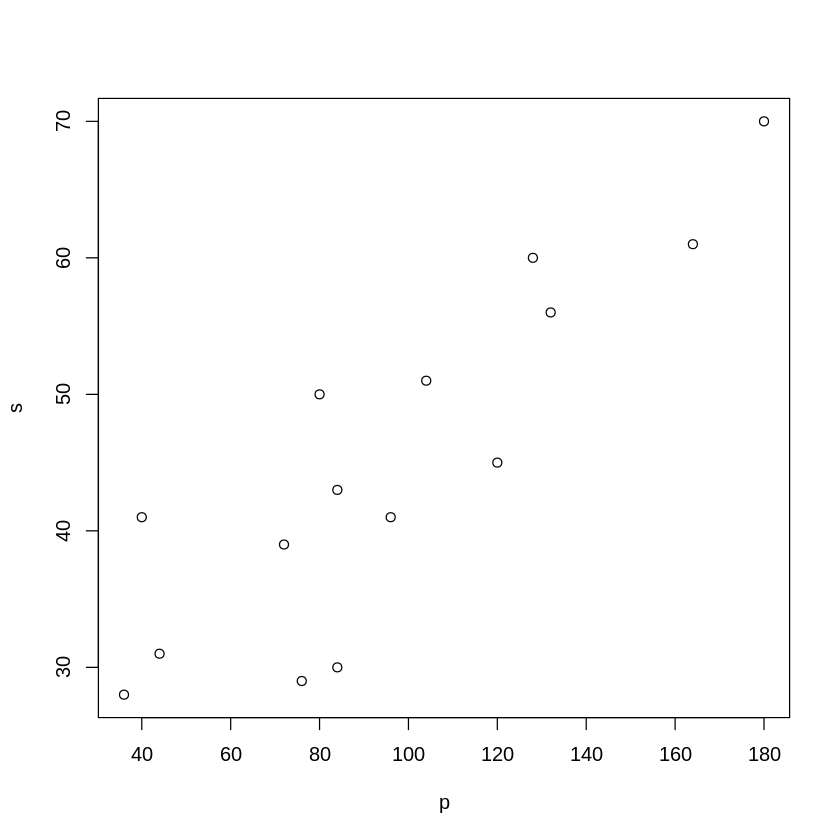

In [2]:
plot(p, s)

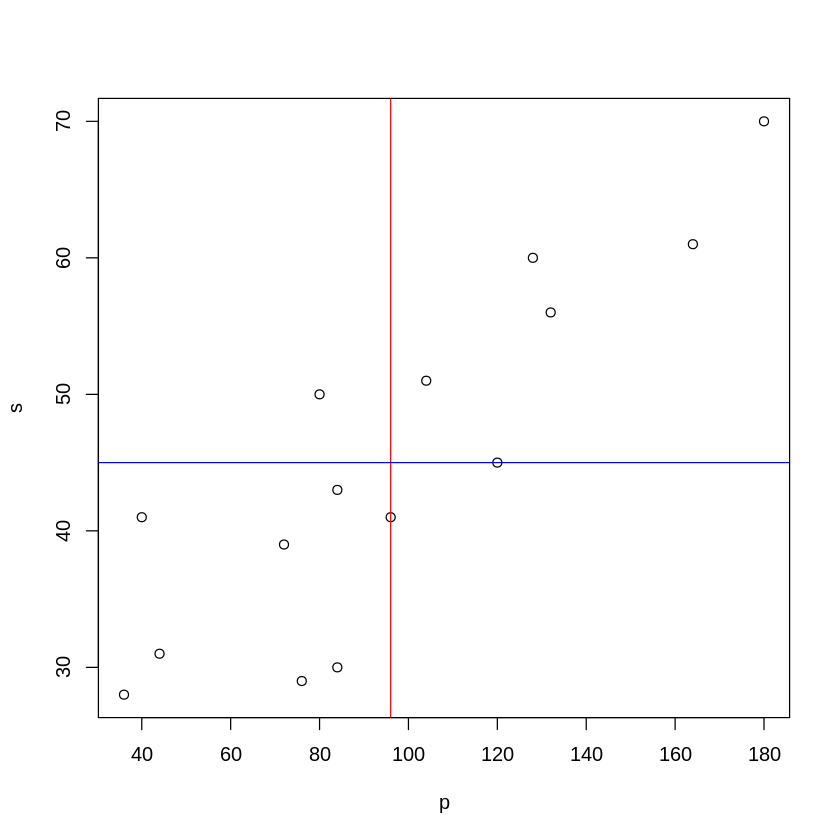

In [3]:
plot(p, s)
abline(v=mean(p), col='red')
abline(h=mean(s), col='blue')

In [4]:
cor(p, s)   # 판촉전화횟수와 판매량이 서로 관련있음

[1] 0.8646318

In [5]:
cor.test(p, s)


	Pearson's product-moment correlation

data:  p and s
t = 6.2051, df = 13, p-value = 3.193e-05
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.6325270 0.9542427
sample estimates:
      cor 
0.8646318 


In [6]:
# 선형방정식을 작성하려면 회귀계수(기울기, 절편)가 필요함
# 최소제곱법으로 계산가능, lm 함수로 바로 구할 수도 있음
lm(s~p)


Call:
lm(formula = s ~ p)

Coefficients:
(Intercept)            p  
    19.9800       0.2606  


회귀계수 : Coefficients <br>
절편 : Intercept = 19.98 <br>
기울기 : p = 0.26 <br>
따라서 선형방정식은 y = 0.26x + 19.98 <br>

작성된 방정식의 의미 <br>
1) 방정식의 x : 판촉전화 횟수 <br>
2) 19.98의 의미 : 판촉전화 횟수가 0일 때 제품을 19.98만큼 팔 수 있다? <br>
   예측에 사용하기에는 다소 조심스러움 <br>
3) 0.26x의 의미 : 판촉전화 횟수가 1일 때 제품을 0.26만큼 팔 수 있다 <br>
   따라서 독립변수가 주어졌을 때 종속변수의 변화량을 파악(예측)할 수 있음

In [7]:
# ex) 계산된 선형방정식을 이용해서 판촉전화 100회시 예상 판매량은?
# y = 0.26x + 19.98
0.26 * 100 + 19.98

[1] 45.98

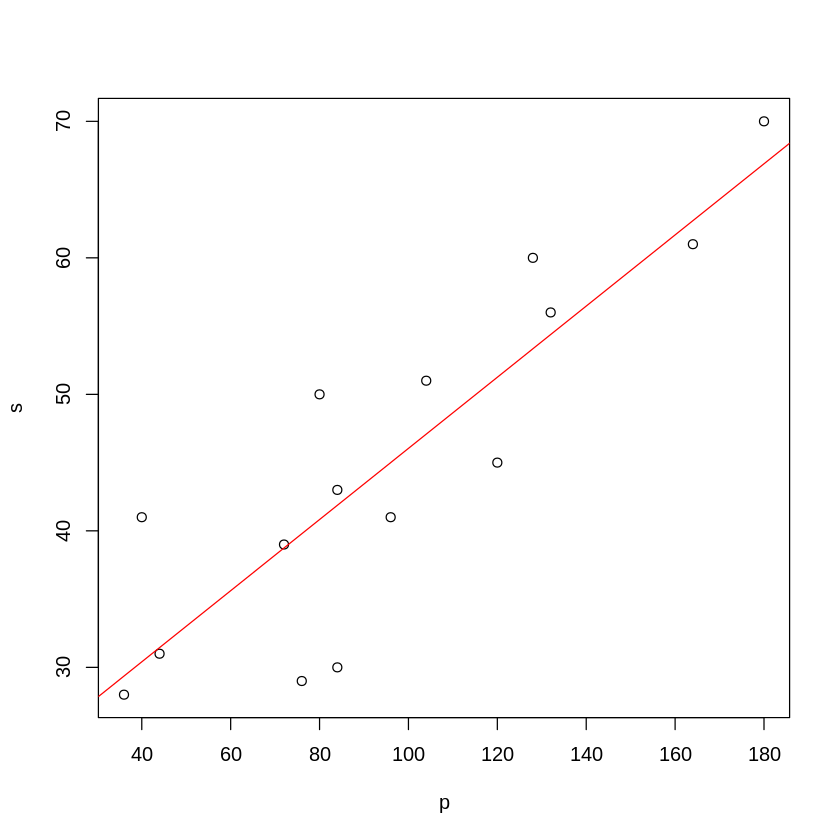

In [8]:
## 선형방정식을 통해 계산된 예측값 시각화
plot(p, s)
abline(lm(s~p), col='red')

In [9]:
# cars 데이터셋을 이용해서 속도 대비 제동거리에 대해 회귀분석을 해보고 선형방정식을 작성해보세요
?cars

cars                 package:datasets                  R Documentation

_S_p_e_e_d _a_n_d _S_t_o_p_p_i_n_g _D_i_s_t_a_n_c_e_s _o_f _C_a_r_s

_D_e_s_c_r_i_p_t_i_o_n:

     The data give the speed of cars and the distances taken to stop.
     Note that the data were recorded in the 1920s.

_U_s_a_g_e:

     cars
     
_F_o_r_m_a_t:

     A data frame with 50 observations on 2 variables.

       [,1]  speed  numeric  Speed (mph)            
       [,2]  dist   numeric  Stopping distance (ft) 
      
_S_o_u_r_c_e:

     Ezekiel, M. (1930) _Methods of Correlation Analysis_.  Wiley.

_R_e_f_e_r_e_n_c_e_s:

     McNeil, D. R. (1977) _Interactive Data Analysis_.  Wiley.

_E_x_a_m_p_l_e_s:

     require(stats); require(graphics)
     plot(cars, xlab = "Speed (mph)", ylab = "Stopping distance (ft)",
          las = 1)
     lines(lowess(cars$speed, cars$dist, f = 2/3, iter = 3), col = "red")
     title(main = "cars data")
     plot(cars, xlab = "Speed (mph)", ylab = "Stopping distance (ft)",
          las = 1, log = "xy")
     title(main = "cars data (logarithmic scales)")
     lines(lowess(cars$speed, cars$dist, f = 2/3, iter = 3), col = "red")
     summary(fm1 <- lm(log(dist) ~ log(speed), data = cars))
     opar <- par(mfrow = c(2, 2), oma = c(0, 0, 1.1, 0),
                 mar = c(4.1, 4.1, 2.1, 1.1))
     plot(fm1)
     par(opar)
     
     ## An example of polynomial regression
     plot(cars, xlab = "Speed (mph)", ylab = "Stopping distance (ft)",
         las = 1, xlim = c(0, 25))
     d <- seq(0, 25, length.out = 200)
     for(degree in 1:4) {
       fm <- lm(dist ~ poly(speed, degree), data = cars)
       assign(paste("cars", degree, sep = "."), fm)
       lines(d, predict(fm, data.frame(speed = d)), col = degree)
     }
     anova(cars.1, cars.2, cars.3, cars.4)

In [10]:
head(cars)

,speed,dist
,<dbl>,<dbl>
1,4,2
2,4,10
3,7,4
4,7,22
5,8,16
6,9,10


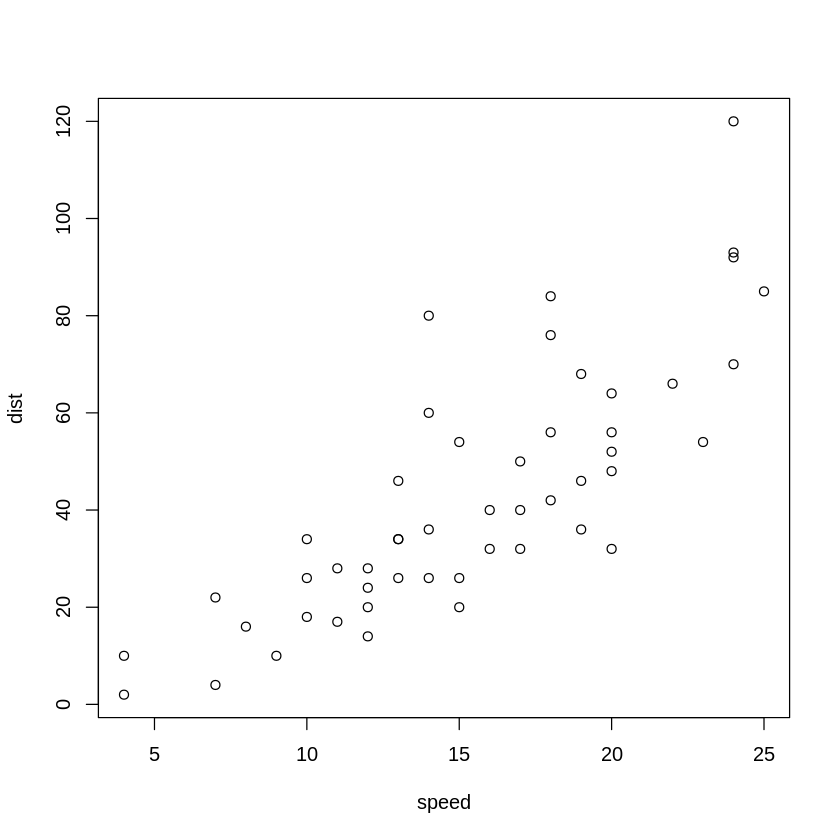

In [11]:
plot(cars)

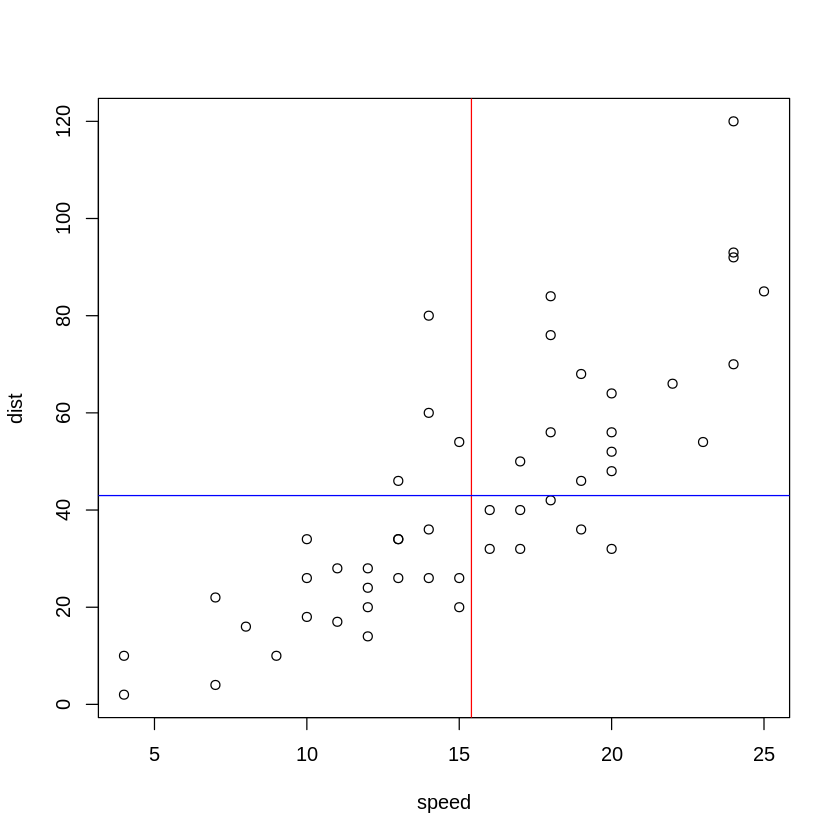

In [12]:
plot(cars)
abline(v = mean(cars$speed), col='red')
abline(h = mean(cars$dist), col='blue')

In [13]:
cor(cars$speed, cars$dist)

[1] 0.8068949

In [14]:
cor.test(cars$speed, cars$dist)


	Pearson's product-moment correlation

data:  cars$speed and cars$dist
t = 9.464, df = 48, p-value = 1.49e-12
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.6816422 0.8862036
sample estimates:
      cor 
0.8068949 


In [15]:
lm(dist~speed, cars)
# y = 3.93x - 17.58


Call:
lm(formula = dist ~ speed, data = cars)

Coefficients:
(Intercept)        speed  
    -17.579        3.932  


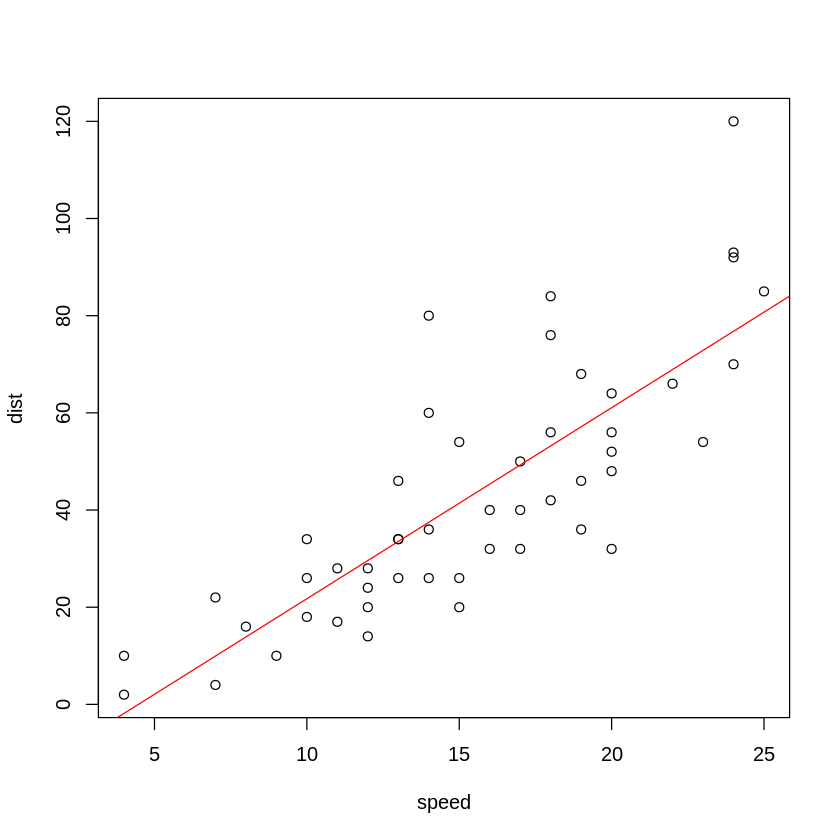

In [16]:
plot(cars)
abline(lm(dist~speed, cars), col='red')

In [17]:
# 식이요법을 적용한 닭에 대한 데이터를 참고해서 '1'번 닭을 대상으로
# 시간대비 몸무게에 대한 회귀분석을 실시하시오 (MASS, ChickWeight)
library(MASS)
?ChickWeight

# weight : 닭 몸무게
# time : 몸무게 측정시 병아리 나이(일수)
# chick : 닭번호
# diet : 닭 모이 종류

ChickWeight {datasets},R Documentation


In [18]:
times <- ChickWeight[ChickWeight$Chick == 1, 2]
weights <- ChickWeight[ChickWeight$Chick == 1, 1]

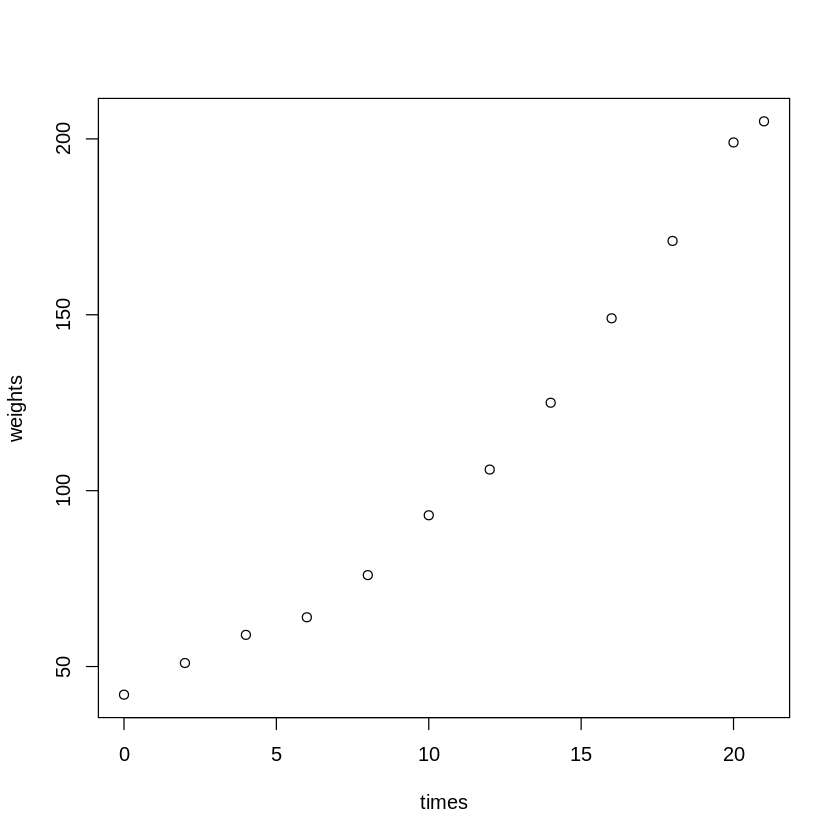

In [19]:
plot(times, weights)

In [20]:
cor(times, weights)

[1] 0.9791822

In [21]:
cor.test(times, weights)


	Pearson's product-moment correlation

data:  times and weights
t = 15.255, df = 10, p-value = 2.974e-08
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.9252014 0.9943209
sample estimates:
      cor 
0.9791822 


In [22]:
lm(weights~times)
# y = 7.99x + 24.465


Call:
lm(formula = weights ~ times)

Coefficients:
(Intercept)        times  
     24.465        7.988  


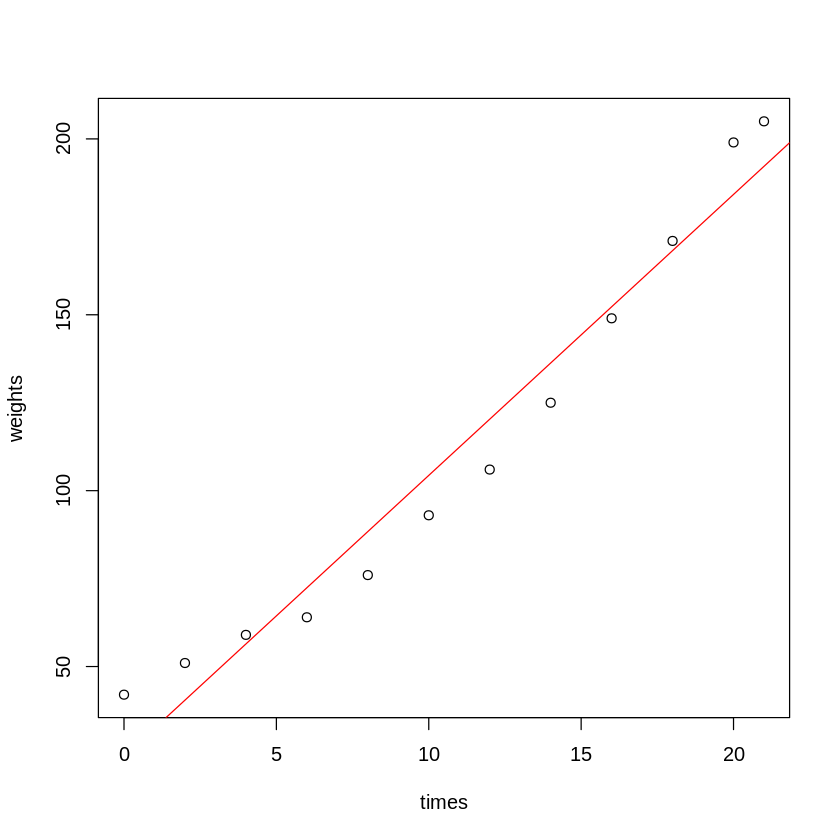

In [23]:
plot(times, weights)
abline(lm(weights~times), col='red')

## 회귀식 평가
전화횟수 대비 판매량에 대한 회귀식 <br>
$ y = 0.26x + 19.98 $

전화횟수가 84일 때 판매량은 41.87로 예측 <br>
하지만, 실제값은 43, 30으로 나옴 <br>
=> 과연, 이 방정식은 믿을만 한가? <br>
=> 회귀모형model 분석 필요
* R에서는 lm함수로 회귀식을 계산한 후 summary 함수로 출력하면 회귀모형 평가 결과 출력

In [24]:
model <- lm(s~p)
summary(model)


Call:
lm(formula = s ~ p)

Residuals:
    Min      1Q  Median      3Q     Max 
-11.873  -2.861   0.255   3.511  10.595 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  19.9800     4.3897   4.552 0.000544 ***
p             0.2606     0.0420   6.205 3.19e-05 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 6.72 on 13 degrees of freedom
Multiple R-squared:  0.7476,	Adjusted R-squared:  0.7282 
F-statistic:  38.5 on 1 and 13 DF,  p-value: 3.193e-05


## 분석결과 이해하기
1. 결정계수 R^2 R-squared: 0.7476 <br>
   회귀모형이 나름의 의미가 존재하는지 여부 파악 <br>
   회귀선과 실제 데이터가 얼마나 가깝게 분포하는지 알아볼 수 있음 <br>
   <br>
2. 회귀계수의 유의성 : F-statistic, p-value <br>
   귀무가설 : 회귀계수 갯수가 0이다 <br>
   대립가설 : 회귀계수 갯수가 0이 아니다 <br>
   F 검정을 통해 회귀계수 유무 파악 <br>
   <br>
3. 각 회귀계수별 유의성 : Coefficients -> Pr(>|t|) <br>
   귀무가설 : 회귀계수가 유의하지 않다 <br>
   대립가설 : 회귀계수가 유의하다 <br>
   t 검정을 통해 각 회귀계수 유무 파악

In [25]:
# cars 데이터셋을 이용한 속도 대비 제동거리에 대한 회귀모형을 평가해보세요

In [26]:
model <- lm(dist~speed, cars)
summary(model)

# R^2 : 0.6511
# F-statistic : p-value=1.49e-12
# Pr(>|t|) : 


Call:
lm(formula = dist ~ speed, data = cars)

Residuals:
    Min      1Q  Median      3Q     Max 
-29.069  -9.525  -2.272   9.215  43.201 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -17.5791     6.7584  -2.601   0.0123 *  
speed         3.9324     0.4155   9.464 1.49e-12 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 15.38 on 48 degrees of freedom
Multiple R-squared:  0.6511,	Adjusted R-squared:  0.6438 
F-statistic: 89.57 on 1 and 48 DF,  p-value: 1.49e-12


In [27]:
# ChickWeigh 데이터셋을 이용한 '1'번 닭을 대상으로
# 시간 대비 몸무게에 대한 회귀모형을 평가해보세요

In [28]:
model <- lm(weights~times)
summary(model)

# R^2 : 0.9588
# F-statistic : p-value=2.974e-08
# Pr(>|t|) : 


Call:
lm(formula = weights ~ times)

Residuals:
     Min       1Q   Median       3Q      Max 
-14.3202 -11.3081  -0.3444  11.1162  17.5346 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  24.4654     6.7279   3.636  0.00456 ** 
times         7.9879     0.5236  15.255 2.97e-08 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 12.29 on 10 degrees of freedom
Multiple R-squared:  0.9588,	Adjusted R-squared:  0.9547 
F-statistic: 232.7 on 1 and 10 DF,  p-value: 2.974e-08


## 선형회귀linear regression
* 데이터들 사이의 상관관계 또는 추이를 예측하거나
* 대상값 자체를 예측하는 지도학습 알고리즘
* 하나의 종속변수와 하나이상의 독립변수 간의 상관관계를 기본으로 하여 <br>
  하나의 n차 선형방정식으로 변수관계를 일반화하는 분석방법

##  선형성linearity
* 두 변수의 관계가 하나의 직선의 형태로 설명될 수 있는 관계를 지닌다는 것

## 회귀분석의 중요 개념
* 선형방정식 : 두 변수간의 관계를 방정식으로 표현
* 기울기     : 독립변수가 종속변수에 얼마나 영향을 주는지 그 크기와 방향을 파악
* 절편       : 회귀선을 얼마나 위/아래로 평행이동시키는지 파악

In [29]:
# 공부시간 대비 성적을 단순선형회귀를 이용해서 예측해 봄
time <- c(2,4,6,8)            # 독립변수 x
jumsu <- c(81,93,91,97)       # 종속변수 y
# 만약, 5/10 시간 공부시 예상 성적은?

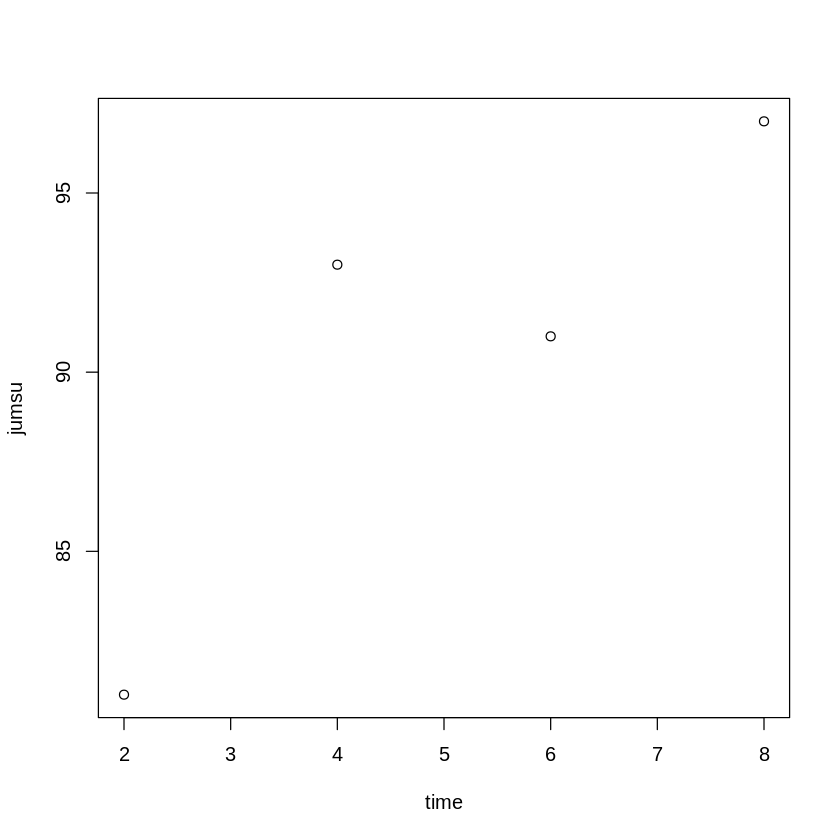

In [30]:
plot(time, jumsu)

In [31]:
# 방정식 : y = ax + b
# 회귀계수 a, b를 구하기 위한 다양한 방법이 존재
# 여기서, 최소제곱법을 이용함
# 기울기 = (x -x평균)*(y - y평균)의 총합/(x -x평균)^2의 총합
# 절편 = y평균 - (x평균 * 기울기)

In [32]:
mx = mean(time)
my = mean(jumsu)
sprintf('%.1f %.1f', mx, my)

[1] "5.0 90.5"

In [33]:
# 최소제곱법 중 분모에 해당하는 값 계산용 함수
# (x - x평균)*(y - y평균)의 총합
dividen <- function(x, mx, y, my) {
   sums <- 0
    for (i in 1:4) {
        sums <- sums + ((x[i] - mx) * (y[i] - my))
    }
    return (sums)
}

In [34]:
divtop <- dividen(time, mx, jumsu, my)
divtop   # 분모

[1] 46

In [35]:
divsor <- 0
for (i in 1:4) {
    divsor <- divsor + ((time[i] - mx) ** 2)
}

In [36]:
divsor   # 분자

[1] 20

In [37]:
a = divtop / divsor
a   # 기울기 : 2.3

[1] 2.3

In [38]:
# y평균 - (x평균 * 기울기)
b = my - (mx * a)
b   # 절편 : 79

[1] 79

In [39]:
model <- lm(jumsu~time)
summary(model)   # y = 2.3x + 79


Call:
lm(formula = jumsu ~ time)

Residuals:
   1    2    3    4 
-2.6  4.8 -1.8 -0.4 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)   
(Intercept)   79.000      4.990  15.832  0.00397 **
time           2.300      0.911   2.525  0.12756   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 4.074 on 2 degrees of freedom
Multiple R-squared:  0.7612,	Adjusted R-squared:  0.6417 
F-statistic: 6.373 on 1 and 2 DF,  p-value: 0.1276


In [40]:
# 선형회귀식을 이용해서 회귀직선을 그려봄
z <- c(0,0,0,0)   # 예측값
for (i in 1:4) {
    z[i] <- (2.3 * time[i] + 79)
}

In [41]:
z
jumsu

[1] 83.6 88.2 92.8 97.4

[1] 81 93 91 97

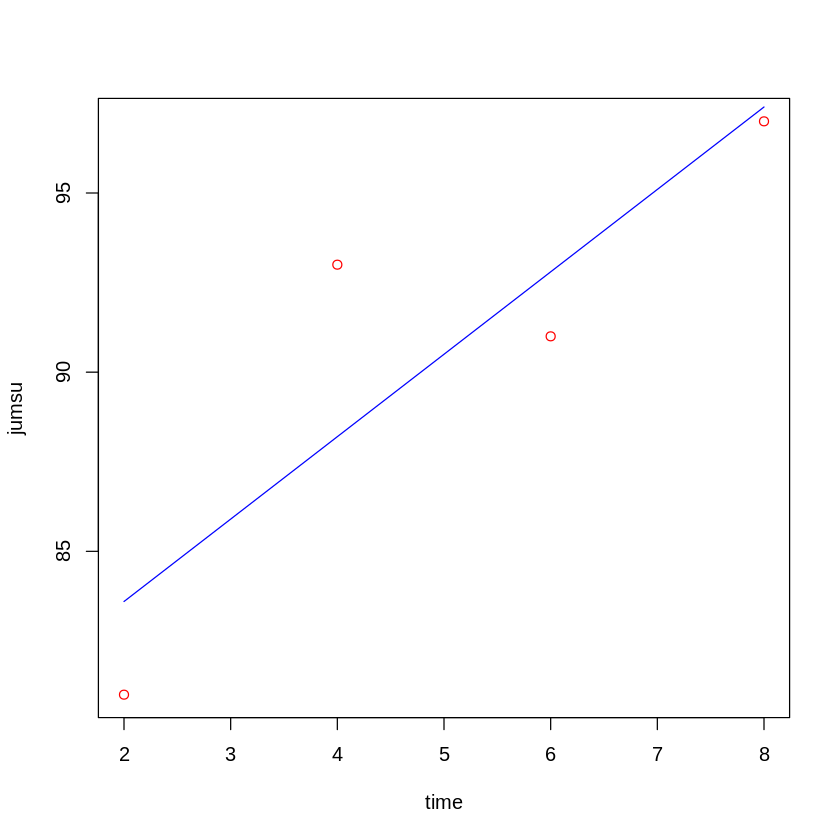

In [42]:
# 에측값/실제값 시각화
plot(time, jumsu, col='red')
lines(time, z, col='blue')

In [43]:
# 5/10 시간 공부시 여상 성적은?
2.3 * 5 + 79
2.3 * 10 + 79

[1] 90.5

[1] 102

In [44]:
# 방정식 : y = ax1 + bx2 + cx3 + d

In [45]:
# 배달정보 데이터를 이용해서 회귀분석을 실시하고 회귀계수와 R^2을 구하세요
delivery <- read.csv('csv/delivery.txt')
head(delivery)

,X100,X20
,<int>,<int>
1,150,24
2,300,36
3,400,47
4,130,22
5,240,32
6,350,47


In [46]:
colnames(delivery) <- c('dist','time')

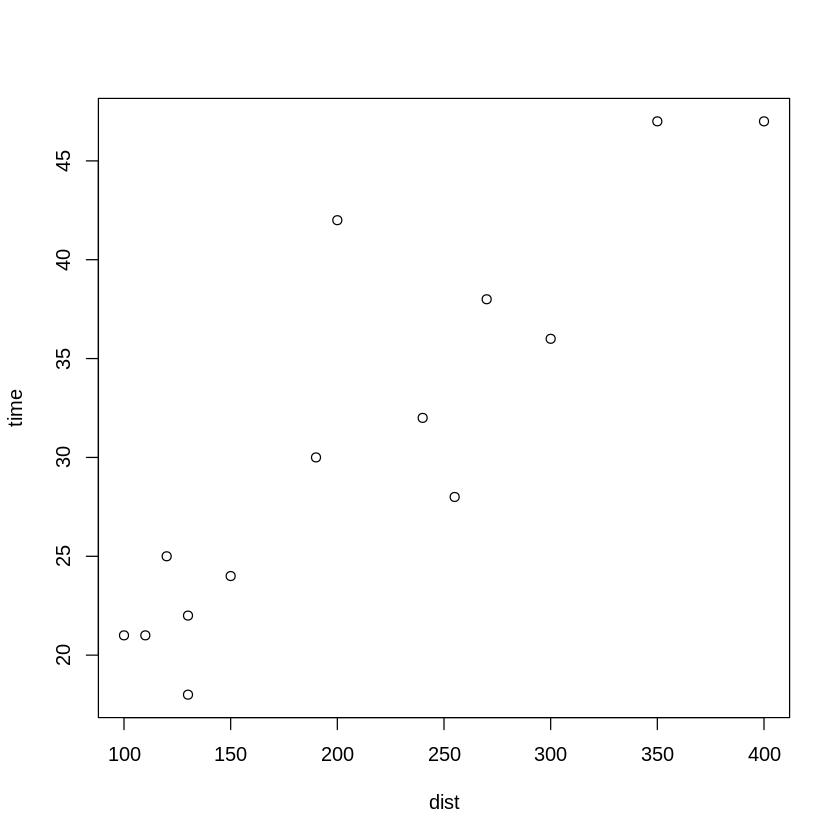

In [47]:
plot(delivery)

In [48]:
cor(delivery$dist, delivery$time)

[1] 0.8886267

In [49]:
cor.test(delivery$dist, delivery$time)


	Pearson's product-moment correlation

data:  delivery$dist and delivery$time
t = 6.7119, df = 12, p-value = 2.159e-05
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.6774617 0.9644707
sample estimates:
      cor 
0.8886267 


In [50]:
lm(time~dist, delivery)
# y = 0.09x + 11.48


Call:
lm(formula = time ~ dist, data = delivery)

Coefficients:
(Intercept)         dist  
   11.48098      0.09177  


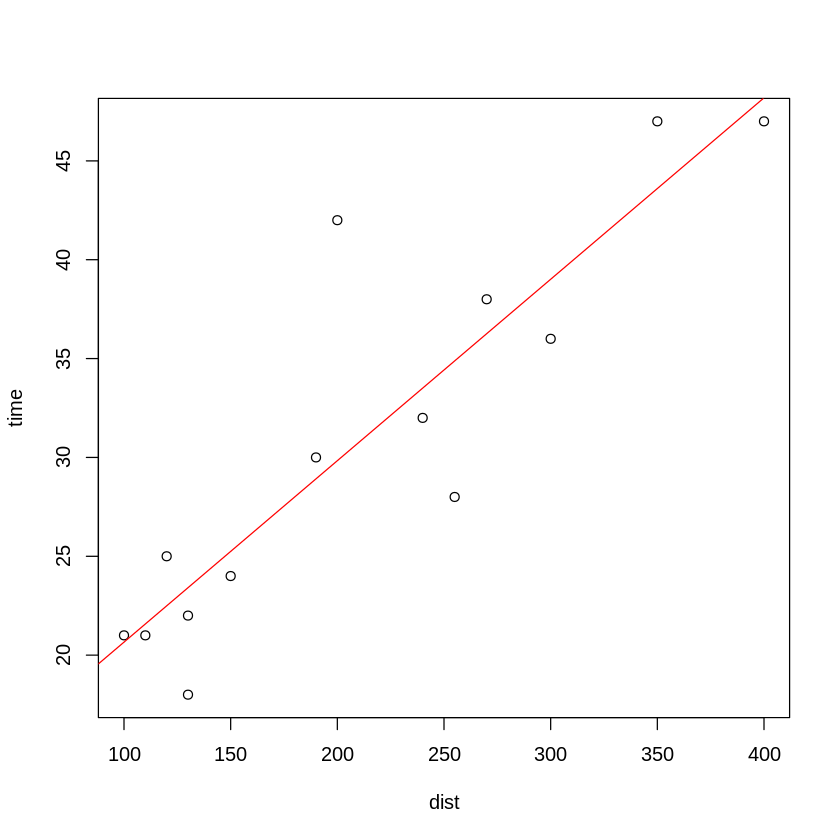

In [51]:
plot(delivery)
abline(lm(time~dist, delivery), col='red')

In [52]:
model <- lm(time~dist, delivery)
summary(model)
# R^2 : 0.7897
# F-statistic : p-value=2.159e-05
# Pr(>|t|) :


Call:
lm(formula = time ~ dist, data = delivery)

Residuals:
    Min      1Q  Median      3Q     Max 
-6.8826 -1.4824 -0.8826  1.5762 12.1648 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 11.48098    3.13695   3.660  0.00327 ** 
dist         0.09177    0.01367   6.712 2.16e-05 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 4.685 on 12 degrees of freedom
Multiple R-squared:  0.7897,	Adjusted R-squared:  0.7721 
F-statistic: 45.05 on 1 and 12 DF,  p-value: 2.159e-05


In [53]:
# women 데이터를 이용해서 회귀분석을 실시하고 회귀계수와 R^2을 구하세요